<font size="+3" color=Blue><b> <center><u>Waste Classification</u></center></b></font>

# Objective

The aim of this kernel is to train my image classification model on waste product image dataset. This kernel will have steps required to implement image classification algorithm using ResNET as well as my designed cnn model on waste product dataset.

I have learned them from [FastAI](https://docs.fast.ai/)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#3)
* [2. Import Libraries ](#4)
    
<font color="blue" size=+1><b> Load and view your data </b></font>
* [1. Setting up path for training data ](#5)
* [2. Data Loading For training ](#6)
* [3. Data Explorations ](#7)
* [4. Print Classes present in the data ](#8)

<font color="blue" size=+1><b> Create and train a model </b></font>
* [1. Create Models ](#9)
* [2. Train Model ](#11)
* [3. Finding LR ](#10)
* [4. Finetuning HyperParameter](#12)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#13)
* [2. Prediction Using Trained Model](#14)
* [3. Save and Load Model](#15)
* [4. Sources](#16)

<a id="3"></a>
<font color="blue" size=+2.5><b>1.1 Installation of Libraries </b></font>

## !pip install fastai

In [ ]:
%pip install fastai --user

In [ ]:
%pip install seaborn --user
%pip install opencv_python --user

<a id="4"></a>
<font color="blue" size=+2.5><b>1.2 Library Import</b></font>

In [2]:
#importing libraries
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

<a id="5"></a>
<font color="blue" size=+2.5><b>2.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [3]:
x = './input/train'
path = Path(x)
path.ls()

(#8) [Path('input/train/battery'),Path('input/train/biological'),Path('input/train/cardboard'),Path('input/train/glass'),Path('input/train/metal'),Path('input/train/paper'),Path('input/train/plastic'),Path('input/train/trash')]

<a id="6"></a>
<font color="blue" size=+2.5><b>2.2 Data Loading For training</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.3 => 30%, 0.2 => 20%, 0.1 => 10% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in my case)
* Test data can also be added but it's optional

In [24]:
np.random.seed(40)
image_data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.3, 
                                    item_tfms=Resize(460), 
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
                                    num_workers=4)

In [4]:
np.random.seed(40)
image_data20 = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, 
                                    item_tfms=Resize(460), 
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
                                    num_workers=4)

In [48]:
np.random.seed(40)
image_data10 = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.1, 
                                    item_tfms=Resize(460), 
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
                                    num_workers=4)

<a id="7"></a>
<font color="blue" size=+2.5><b>2.3 Data Explorations</b></font>
<br/>

*Our image dataset is stored as .jpg files in 8 different folders, with each folder bearing the name of model of the images contained in the folder. We use the ImageDataBunch.from_folder() function to load the images and assign labels the images based on the name of the folder they’re read from.*

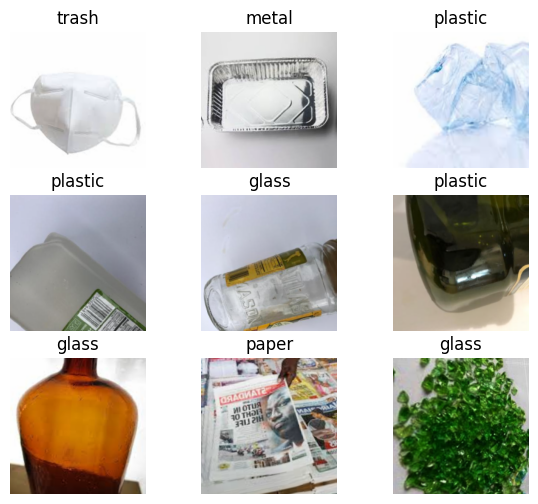

In [4]:
image_data.show_batch(max_n=9, figsize=(7,6))

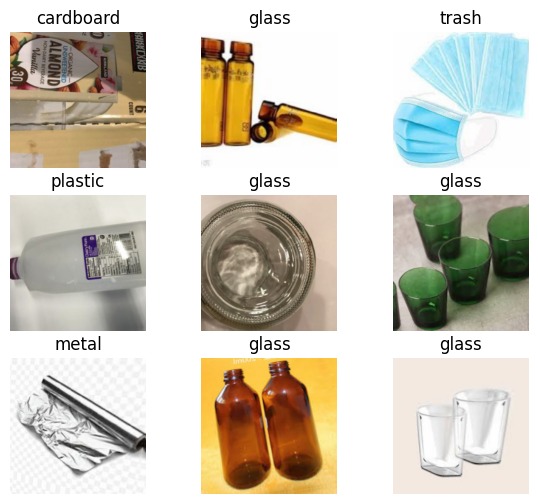

In [31]:
image_data20.show_batch(max_n=9, figsize=(7,6))

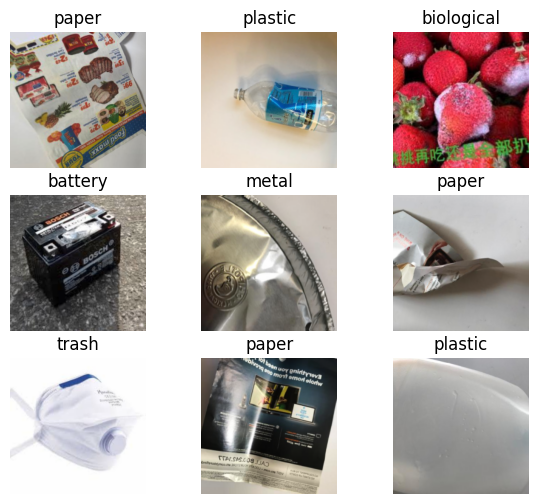

In [5]:
image_data20.show_batch(max_n=9, figsize=(7,6))

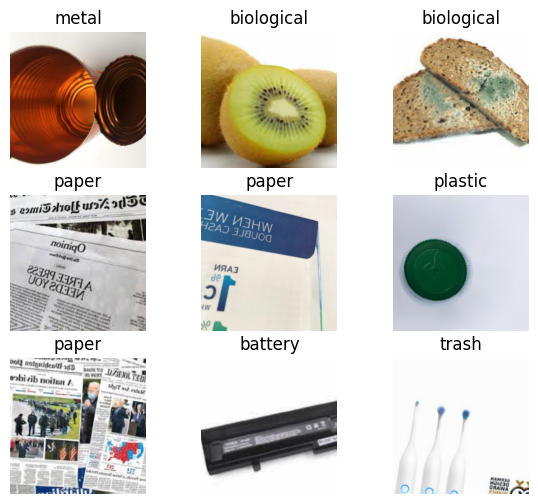

In [25]:
image_data.show_batch(max_n=9, figsize=(7,6))

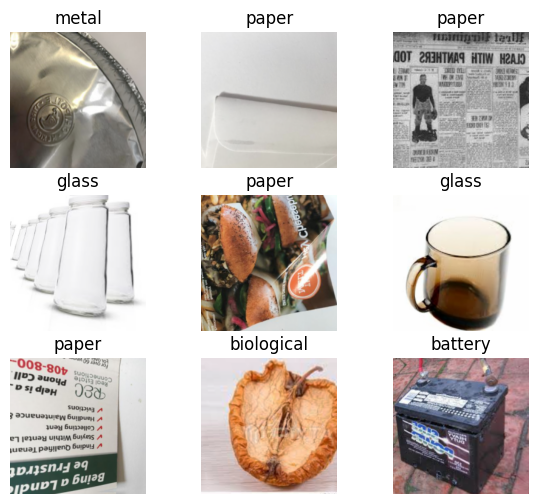

In [7]:
image_data10.show_batch(max_n=9, figsize=(7,6))

<a id="8"></a>
<font color="blue" size=+2.5><b>2.4 Print Classes present in the data</b></font>
<br/>

* data.c — How many classes are there in our dataset?
* len(data.train_ds) — What is the size of our training dataset?
* len(data.valid_ds) — What is the size of our validation dataset?

In [6]:
# Accessing training and validation datasets
train_dataset = image_data.train
valid_dataset = image_data.valid

# Checking number of items in each dataset
num_train_examples = len(train_dataset.items)
num_valid_examples = len(valid_dataset.items)

# Viewing dataset classes
classes = image_data.vocab if hasattr(image_data, 'vocab') else image_data.classes

# Print summary
print(f"Number of training examples: {num_train_examples}")
print(f"Number of validation examples: {num_valid_examples}")
print(f"Classes in dataset: {classes}")


Number of training examples: 5032
Number of validation examples: 2156
Classes in dataset: ['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [33]:
# Accessing training and validation datasets
train_dataset = image_data20.train
valid_dataset = image_data20.valid

# Checking number of items in each dataset
num_train_examples = len(train_dataset.items)
num_valid_examples = len(valid_dataset.items)

# Viewing dataset classes
classes = image_data20.vocab if hasattr(image_data20, 'vocab') else image_data20.classes

# Print summary
print(f"Number of training examples: {num_train_examples}")
print(f"Number of validation examples: {num_valid_examples}")
print(f"Classes in dataset: {classes}")


Number of training examples: 5751
Number of validation examples: 1437
Classes in dataset: ['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [9]:
# Accessing training and validation datasets
train_dataset = image_data10.train
valid_dataset = image_data10.valid

# Checking number of items in each dataset
num_train_examples = len(train_dataset.items)
num_valid_examples = len(valid_dataset.items)

# Viewing dataset classes
classes = image_data10.vocab if hasattr(image_data10, 'vocab') else image_data10.classes

# Print summary
print(f"Number of training examples: {num_train_examples}")
print(f"Number of validation examples: {num_valid_examples}")
print(f"Classes in dataset: {classes}")


Number of training examples: 6470
Number of validation examples: 718
Classes in dataset: ['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [26]:
print(image_data.vocab)
len(image_data.vocab)
image_data.c


['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


8

In [6]:
print(image_data20.vocab)
len(image_data20.vocab)
image_data20.c


['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


8

In [49]:
print(image_data10.vocab)
len(image_data10.vocab)
image_data10.c


['battery', 'biological', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


8

<a id="9"></a>
<font color="blue" size=+2.5><b>3.1 Create Model</b></font>
<br/>
* We import the designed CNN model to train our dataset
* We also use a pre-trained ResNet18 Convolutional Neural Net model, and use transfer learning to learn weights of only the last layer of the network.
* Why Transfer learning? Because with transfer learning, you begin with an existing (trained) neural network used for image recognition — and then tweak it a bit (or more) here and there to train a model for your particular use case. And why do we do that? Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images.
* In our case, we have approximately 7200 images in our training set — you have one guess to decide if that would have been enough if were to train a neural net from scratch.
* We use the Learner() function for loading my designed model
* We use the vision_learner() function for loading a pre-trained ResNet18 network, that was trained on around a million images from the ImageNet database.

In [7]:
from model import MyCNNModel

In [8]:
learn = vision_learner(image_data, models.resnet18, metrics=[accuracy], model_dir=Path('./working'), path=Path("."))

In [35]:
learn20 = vision_learner(image_data20, models.resnet18, metrics=[accuracy], model_dir=Path('./working20'), path=Path("."))

In [11]:
learn10 = vision_learner(image_data10, models.resnet18, metrics=[accuracy], model_dir=Path('./working10'), path=Path("."))

In [8]:
model = MyCNNModel()
learnCNN20 = Learner(image_data20, model, metrics=[accuracy], model_dir=Path('./workingCNN'), path=Path("."))

In [27]:
learnCNN30 = Learner(image_data, model, metrics=[accuracy], model_dir=Path('./workingCNN30'), path=Path("."))

In [50]:
learnCNN10 = Learner(image_data10, model, metrics=[accuracy], model_dir=Path('./workingCNN10'), path=Path("."))

<a id="10"></a>
<font color="blue" size=+2.5><b>3.2 Finding LR</b></font>
<br/>

SuggestedLRs(valley=0.0020892962347716093)


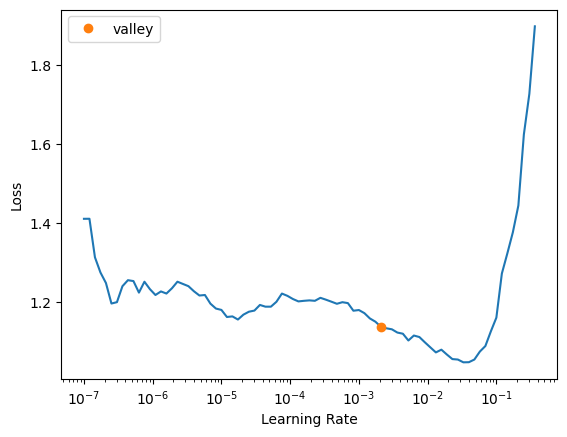

In [13]:
lr_valley = learn.lr_find()
print(lr_valley)

SuggestedLRs(valley=0.0012022644514217973)


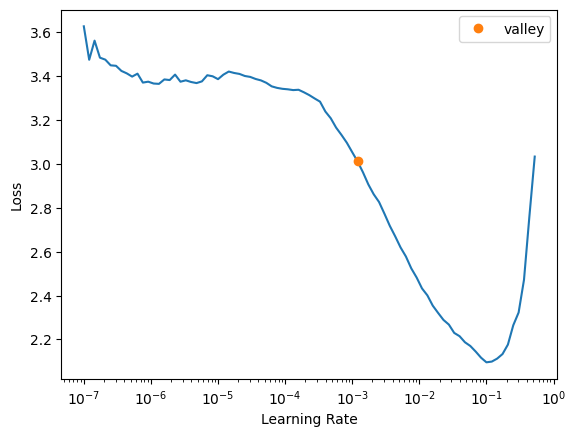

In [36]:
lr_valley20 = learn20.lr_find()
print(lr_valley20)

SuggestedLRs(valley=0.0010000000474974513)


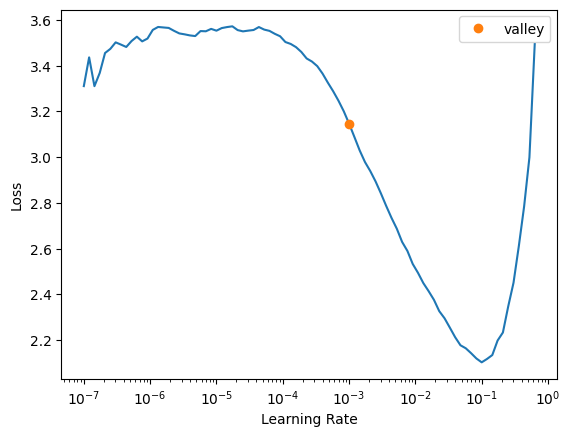

In [12]:
lr_valley10 = learn10.lr_find()
print(lr_valley10)

SuggestedLRs(valley=0.00010964782268274575)


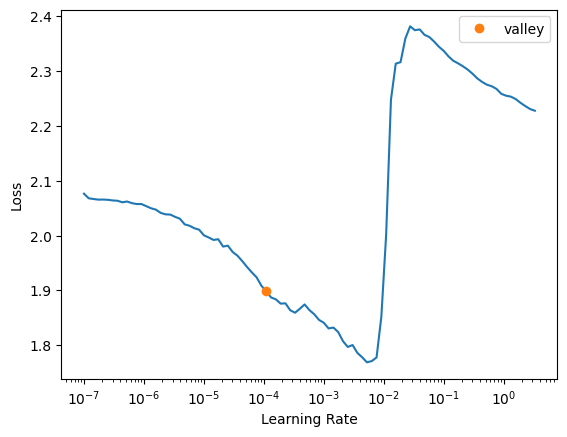

In [9]:
lr_valleyCNN20 = learnCNN20.lr_find()
print(lr_valleyCNN20)

SuggestedLRs(valley=0.00013182566908653826)


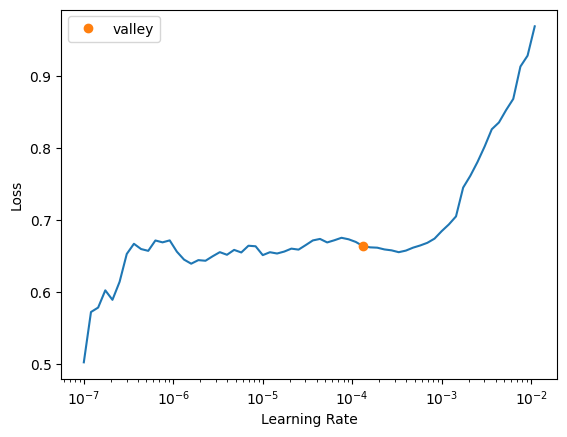

In [28]:
lr_valleyCNN30 = learnCNN30.lr_find()
print(lr_valleyCNN30)

SuggestedLRs(valley=2.511886486900039e-05)


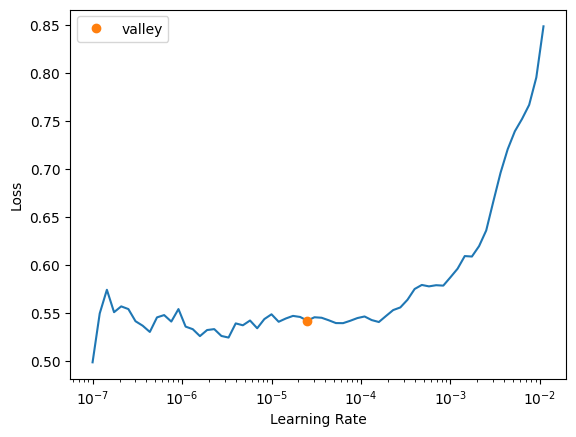

In [51]:
lr_valleyCNN10 = learnCNN10.lr_find()
print(lr_valleyCNN10)

In [14]:
learn.fine_tune(1, base_lr = 2.09e-3)

In [37]:
learn20.fine_tune(1, base_lr = 1.20e-3)

In [13]:
learn10.fine_tune(1, base_lr = 1.0e-3)

In [10]:
learnCNN20.fine_tune(1, base_lr = 1.096e-4)

In [29]:
learnCNN30.fine_tune(1, base_lr = 1.32e-4)

In [52]:
learnCNN10.fine_tune(1, base_lr = 2.51e-5)

SuggestedLRs(valley=1.2022644114040304e-05)


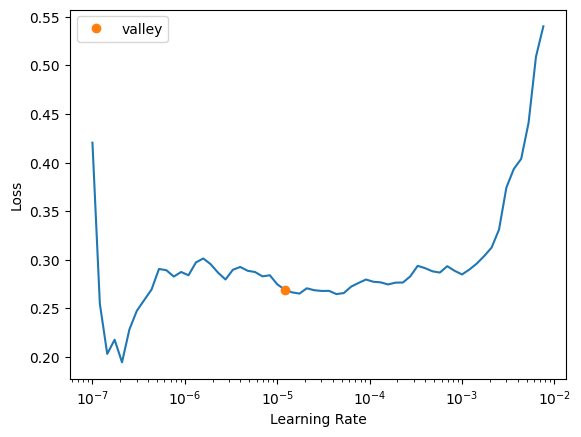

In [15]:
lr_valley = learn.lr_find()
print(lr_valley)

SuggestedLRs(valley=5.248074739938602e-05)


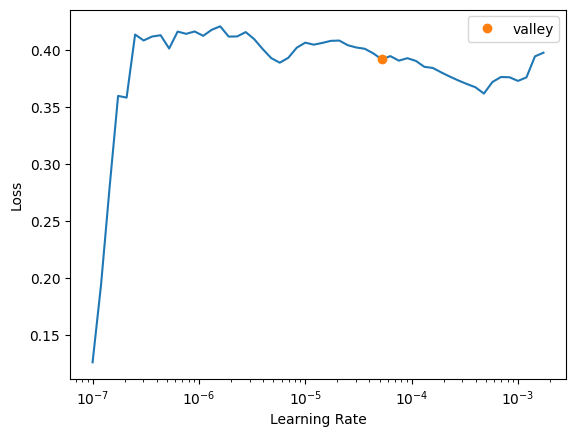

In [38]:
lr_valley20 = learn20.lr_find()
print(lr_valley20)

SuggestedLRs(valley=6.30957365501672e-05)


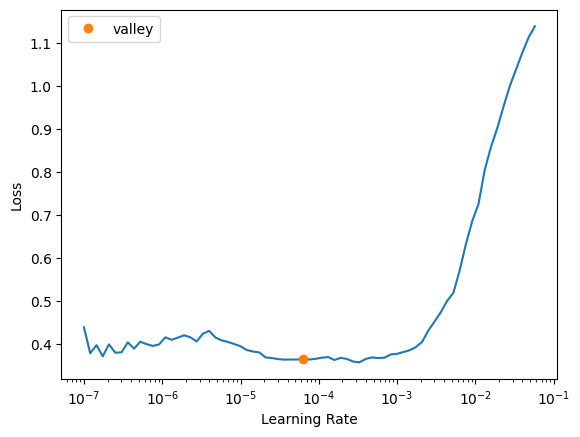

In [14]:
lr_valley10 = learn10.lr_find()
print(lr_valley10)

SuggestedLRs(valley=0.00019054606673307717)


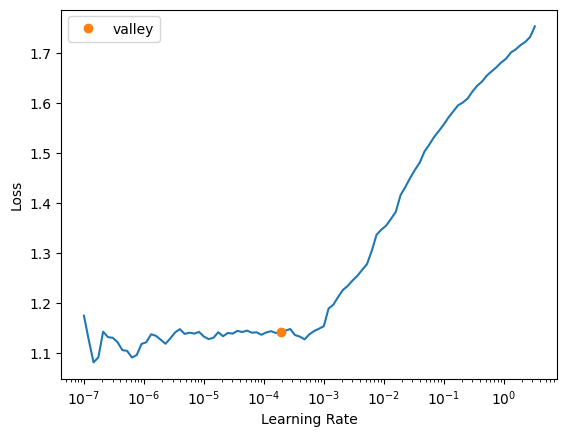

In [11]:
lr_valleyCNN20 = learnCNN20.lr_find()
print(lr_valleyCNN20)

SuggestedLRs(valley=0.00010964782268274575)


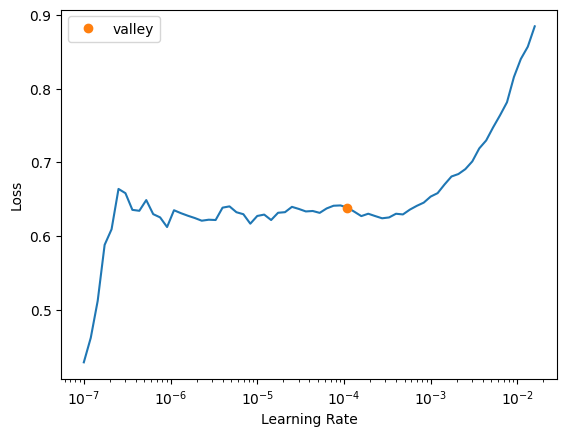

In [30]:
lr_valleyCNN30 = learnCNN30.lr_find()
print(lr_valleyCNN30)

SuggestedLRs(valley=4.786300905834651e-06)


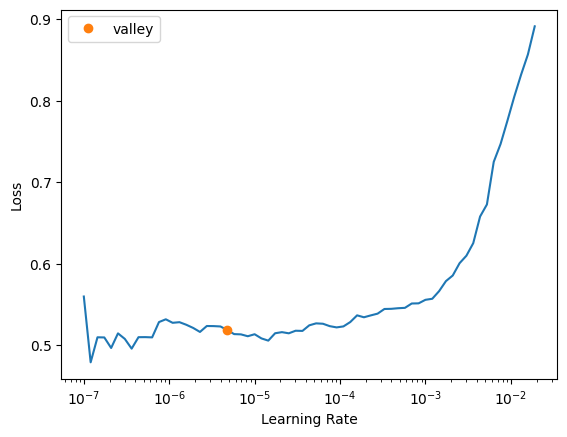

In [53]:
lr_valleyCNN10 = learnCNN10.lr_find()
print(lr_valleyCNN10)

<a id="11"></a>
<font color="blue" size=+2.5><b>3.3 Train Model</b></font>
<br/>

In [16]:
learn.fit_one_cycle(10,1.20e-5)

In [39]:
learn20.fit_one_cycle(10,5.25e-5)

In [15]:
learn10.fit_one_cycle(10,6.31e-5)

In [13]:
learnCNN20.fit_one_cycle(10, 1.91e-4)

In [31]:
learnCNN30.fit_one_cycle(10, 1.096e-4)

In [57]:
learnCNN10.fit_one_cycle(10, 4.79e-6)

<a id="12"></a>
<font color="blue" size=+2.5><b>3.4 Hyper Parameter Tuning</b></font>


In [17]:
learn.unfreeze()
learn.fit_one_cycle(5,1.20e-5)


In [40]:
learn20.unfreeze()
learn20.fit_one_cycle(5,5.25e-5)

In [16]:
learn10.unfreeze()
learn10.fit_one_cycle(5,6.31e-5)

In [14]:
learnCNN20.unfreeze()
learnCNN20.fit_one_cycle(5, 1.91e-4)

In [32]:
learnCNN30.unfreeze()
learnCNN30.fit_one_cycle(5, 1.096e-4)

In [58]:
learnCNN10.unfreeze()
learnCNN10.fit_one_cycle(5, 4.79e-6)

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

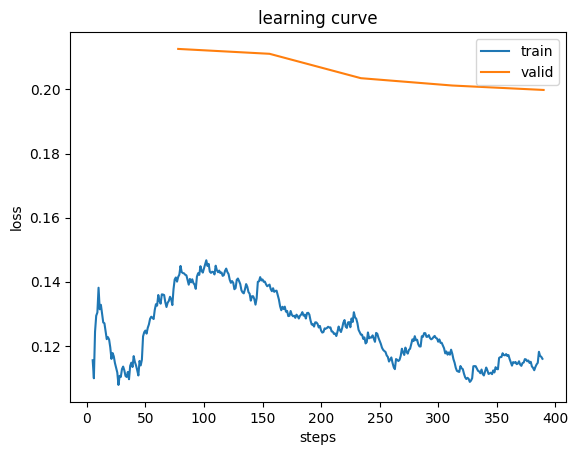

In [18]:
learn.recorder.plot_loss()

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

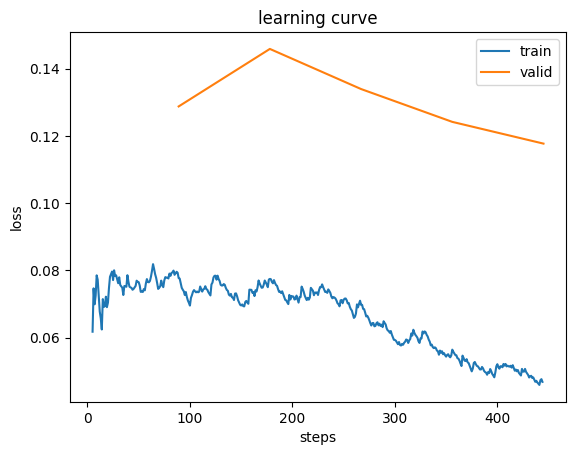

In [41]:
learn20.recorder.plot_loss()

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

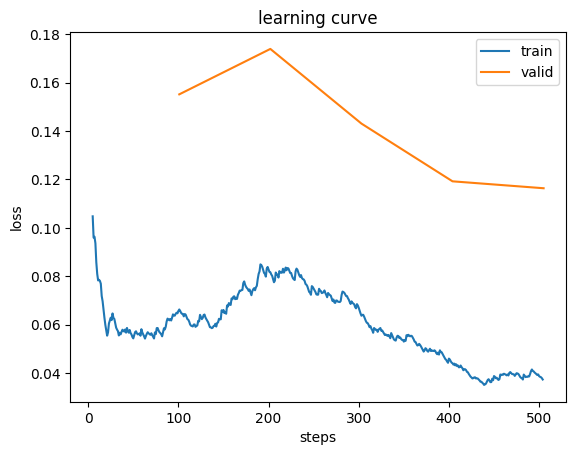

In [17]:
learn10.recorder.plot_loss()

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

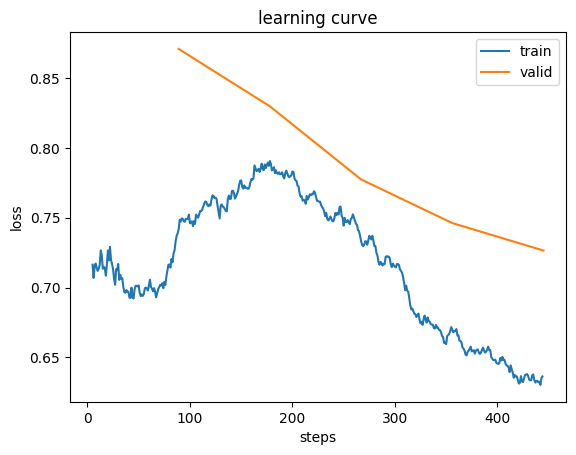

In [15]:
learnCNN20.recorder.plot_loss()

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

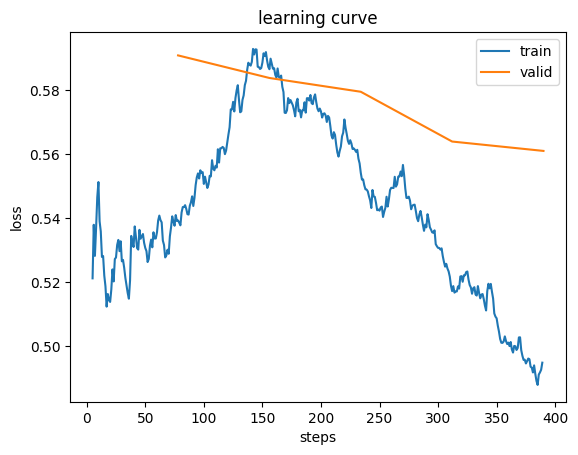

In [33]:
learnCNN30.recorder.plot_loss()

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

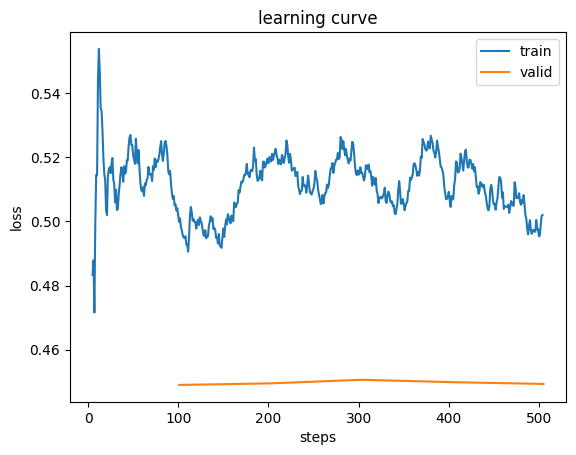

In [59]:
learnCNN10.recorder.plot_loss()

# <a id="13"></a>
<font color="blue" size=+2.5><b>4.1 Interpret the results</b></font>

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

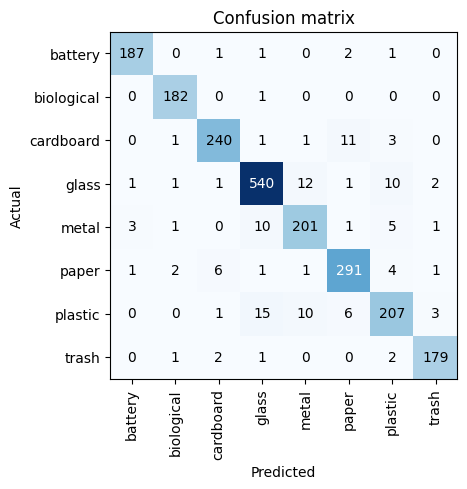

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

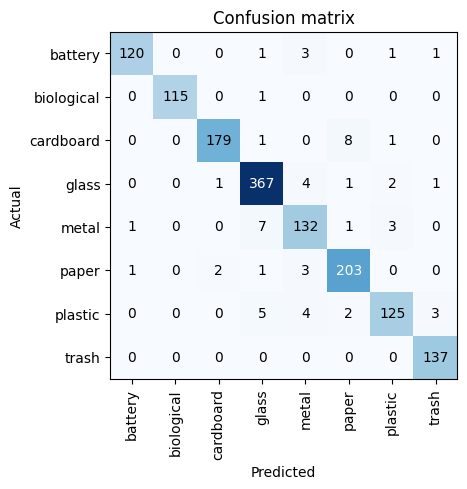

In [42]:
interp20 = ClassificationInterpretation.from_learner(learn20)
interp20.plot_confusion_matrix()

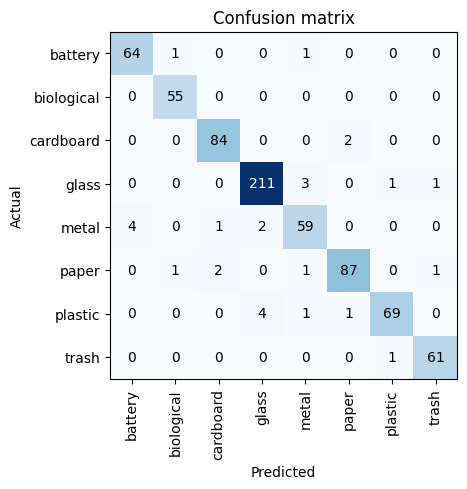

In [18]:
interp10 = ClassificationInterpretation.from_learner(learn10)
interp10.plot_confusion_matrix()

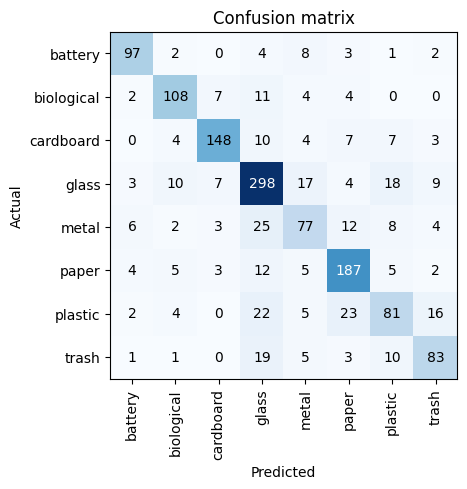

In [16]:
interpCNN20 = ClassificationInterpretation.from_learner(learnCNN20)
interpCNN20.plot_confusion_matrix()

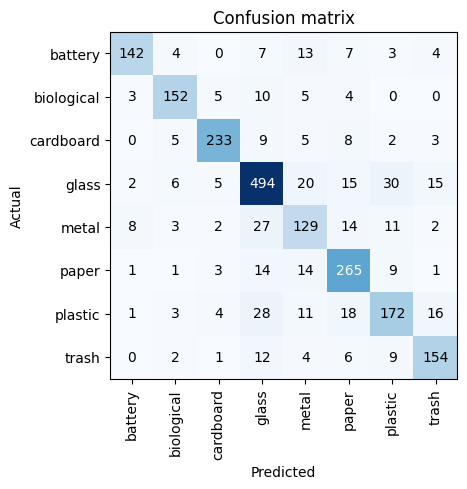

In [34]:
interpCNN30 = ClassificationInterpretation.from_learner(learnCNN30)
interpCNN30.plot_confusion_matrix()

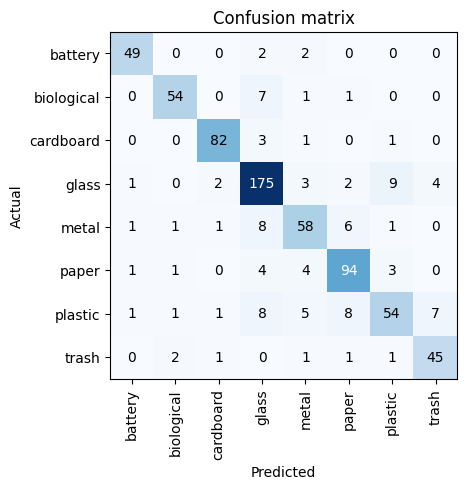

In [60]:
interpCNN10 = ClassificationInterpretation.from_learner(learnCNN10)
interpCNN10.plot_confusion_matrix()

In [41]:
interpCNN20.print_classification_report()

              precision    recall  f1-score   support

     battery       0.87      0.88      0.88       117
  biological       0.91      0.85      0.88       136
   cardboard       0.93      0.85      0.89       183
       glass       0.83      0.86      0.85       366
       metal       0.67      0.67      0.67       137
       paper       0.83      0.91      0.87       223
     plastic       0.73      0.67      0.70       153
       trash       0.75      0.76      0.76       122

    accuracy                           0.82      1437
   macro avg       0.82      0.81      0.81      1437
weighted avg       0.82      0.82      0.82      1437



In [40]:
interpCNN30.print_classification_report()

              precision    recall  f1-score   support

     battery       0.90      0.79      0.84       180
  biological       0.86      0.85      0.86       179
   cardboard       0.92      0.88      0.90       265
       glass       0.82      0.84      0.83       587
       metal       0.64      0.66      0.65       196
       paper       0.79      0.86      0.82       308
     plastic       0.73      0.68      0.70       253
       trash       0.79      0.82      0.80       188

    accuracy                           0.81      2156
   macro avg       0.81      0.80      0.80      2156
weighted avg       0.81      0.81      0.81      2156



In [61]:
interpCNN10.print_classification_report()

              precision    recall  f1-score   support

     battery       0.92      0.92      0.92        53
  biological       0.92      0.86      0.89        63
   cardboard       0.94      0.94      0.94        87
       glass       0.85      0.89      0.87       196
       metal       0.77      0.76      0.77        76
       paper       0.84      0.88      0.86       107
     plastic       0.78      0.64      0.70        85
       trash       0.80      0.88      0.84        51

    accuracy                           0.85       718
   macro avg       0.85      0.85      0.85       718
weighted avg       0.85      0.85      0.85       718



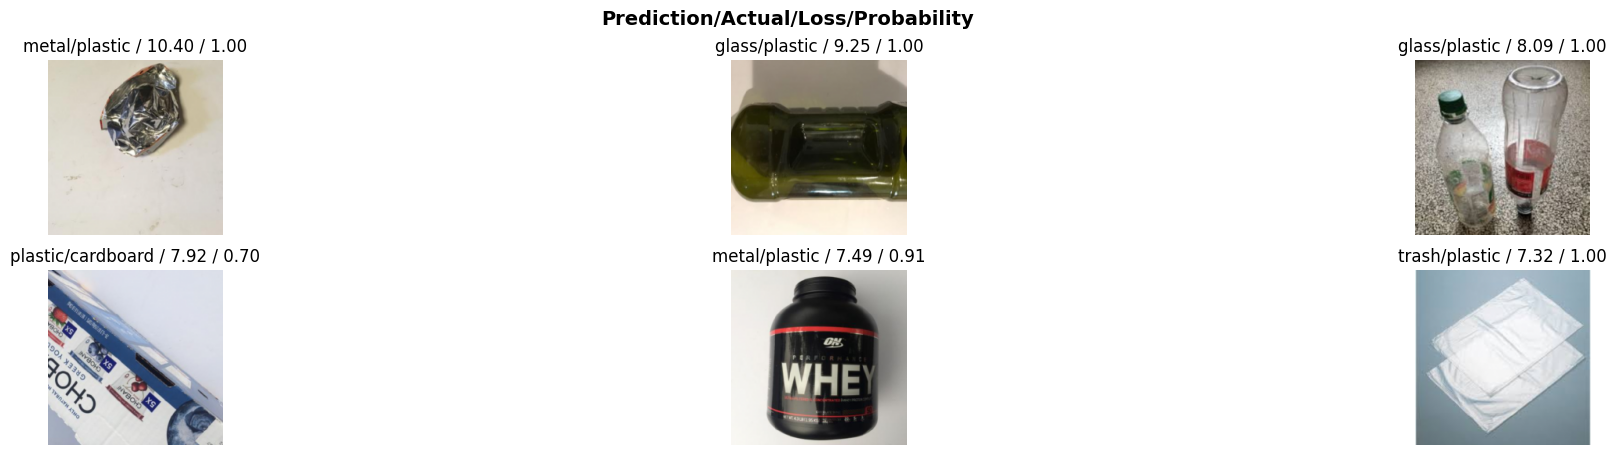

In [20]:
interp.plot_top_losses(6,figsize = (25,5))

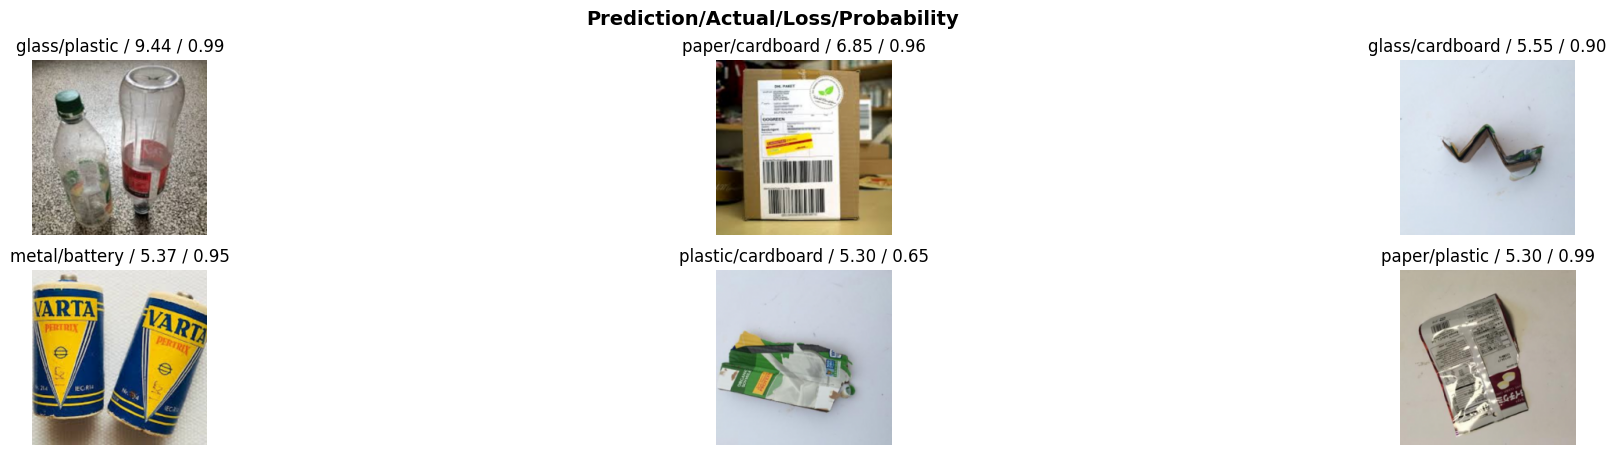

In [43]:
interp20.plot_top_losses(6,figsize = (25,5))

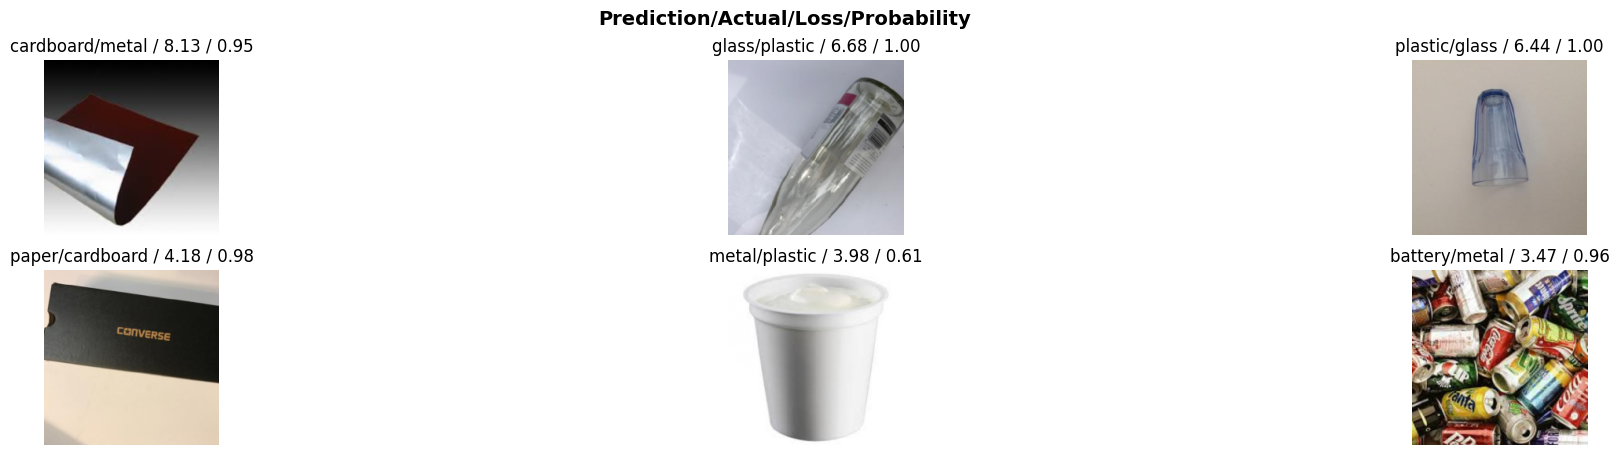

In [19]:
interp10.plot_top_losses(6,figsize = (25,5))

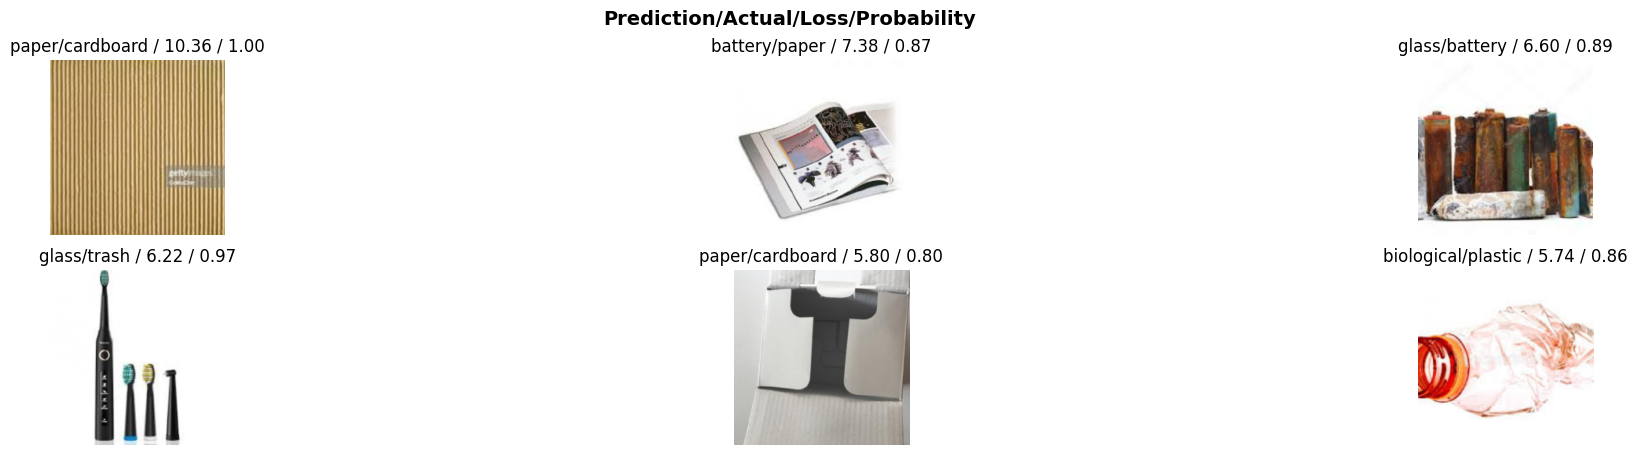

In [17]:
interpCNN20.plot_top_losses(6,figsize = (25,5))

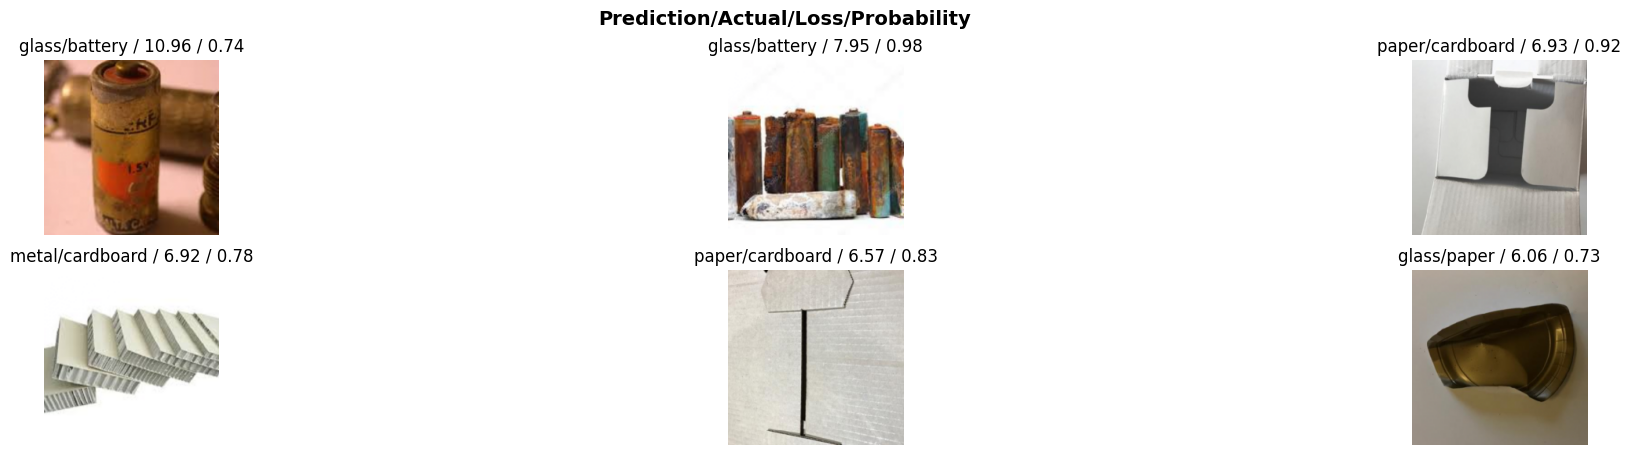

In [35]:
interpCNN30.plot_top_losses(6, figsize = (25,5))

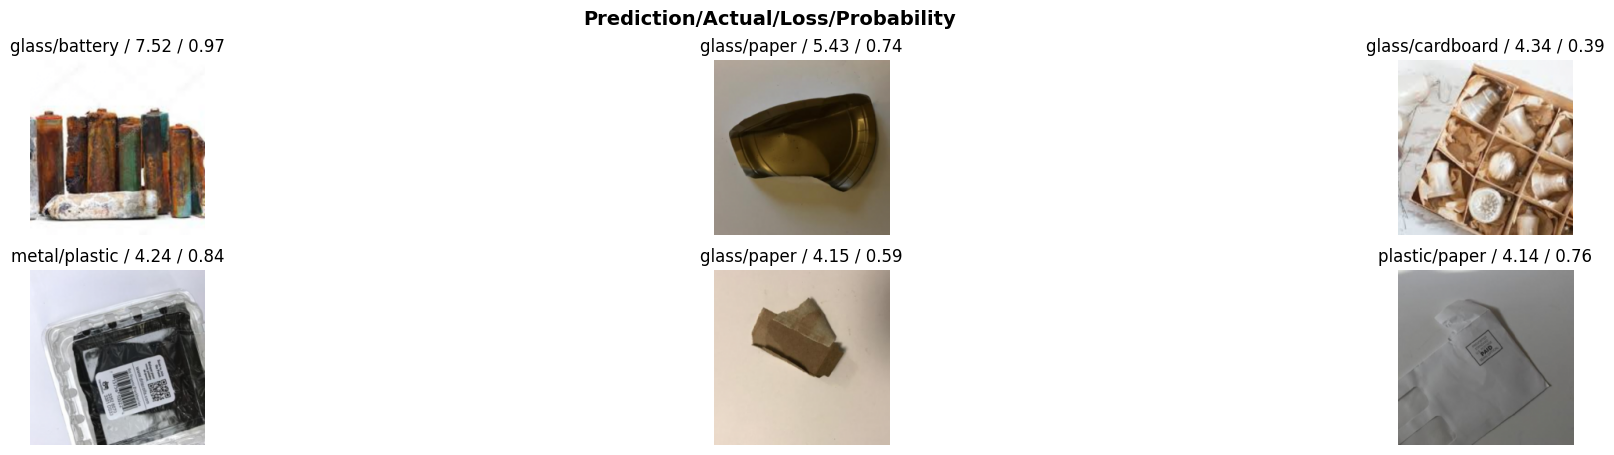

In [62]:
interpCNN10.plot_top_losses(6, figsize = (25,5))

<a id="14"></a>
<font color="blue" size=+2.5><b>4.2 Prediction Using Trained Model</b></font>

In [22]:
img = load_image('./input/test/battery/battery301.jpg')
print(learn.predict(img)[0])

battery


In [24]:
img = load_image('./input/test/battery/battery711.jpg')
print(learn.predict(img)[0])

battery


In [25]:
img = load_image('./input/test/biological/biological944.jpg')
print(learn.predict(img)[0])

biological


In [26]:
img = load_image('./input/test/glass/brown-glass606.jpg')
print(learn.predict(img)[0])

glass


In [51]:
img = load_image('./input/test/battery/battery565.jpg')
print(learn.predict(img)[0])

battery


In [44]:
img = load_image('./input/test/glass/brown-glass606.jpg')
print(learn20.predict(img)[0])

glass


In [45]:
img = load_image('./input/test/battery/battery565.jpg')
print(learn20.predict(img)[0])

battery


In [46]:
img = load_image('./input/test/battery/battery729.jpg')
print(learn20.predict(img)[0])

battery


In [47]:
img = load_image('./input/test/biological/biological958.jpg')
print(learn20.predict(img)[0])

biological


In [20]:
img = load_image('./input/test/glass/brown-glass606.jpg')
print(learn10.predict(img)[0])

glass


In [21]:
img = load_image('./input/test/battery/battery565.jpg')
print(learn10.predict(img)[0])

battery


In [22]:
img = load_image('./input/test/battery/battery729.jpg')
print(learn10.predict(img)[0])

battery


In [23]:
img = load_image('./input/test/biological/biological958.jpg')
print(learn10.predict(img)[0])

biological


In [24]:
img = load_image('./input/test/cardboard/cardboard859.jpg')
print(learn10.predict(img)[0])

cardboard


In [25]:
img = load_image('./input/test/paper/paper1009.jpg')
print(learn10.predict(img)[0])

paper


In [18]:
img = load_image('./input/test/battery/battery729.jpg')
print(learnCNN20.predict(img)[0])

battery


In [21]:
img = load_image('./input/test/paper/paper1009.jpg')
print(learnCNN20.predict(img)[0])

paper


In [36]:
img = load_image('./input/test/paper/paper1009.jpg')
print(learnCNN30.predict(img)[0])

paper


In [37]:
img = load_image('./input/test/battery/battery729.jpg')
print(learnCNN30.predict(img)[0])

battery


In [65]:
img = load_image('./input/test/battery/battery565.jpg')
print(learnCNN10.predict(img)[0])

battery


In [64]:
img = load_image('./input/test/paper/paper1009.jpg')
print(learnCNN10.predict(img)[0])

paper


<a id="15"></a>
<font color="blue" size=+2.5><b>4.3 Save and Load Model</b></font>

In [27]:
img = load_image('./input/test/trash/trash22.jpg')
print(learn.predict(img)[0])

trash


In [48]:
img = load_image('./input/test/trash/trash22.jpg')
print(learn20.predict(img)[0])

trash


In [26]:
img = load_image('./input/test/trash/trash22.jpg')
print(learn10.predict(img)[0])

trash


In [22]:
img = load_image('./input/test/trash/trash22.jpg')
print(learnCNN20.predict(img)[0])

trash


In [38]:
img = load_image('./input/test/trash/trash22.jpg')
print(learnCNN30.predict(img)[0])

biological


In [66]:
img = load_image('./input/test/trash/trash22.jpg')
print(learnCNN10.predict(img)[0])

biological


In [28]:
learn.export(fname = "export.pkl")
learn.model_dir = "./working"
learn.save("stage-1")

Path('working/stage-1.pth')

In [49]:
learn20.export(fname = "export20.pkl")
learn20.model_dir = "./working20"
learn20.save("stage-1")

Path('working20/stage-1.pth')

In [28]:
learn10.export(fname = "export10.pkl")
learn10.model_dir = "./working10"
learn10.save("stage-1")

Path('working10/stage-1.pth')

In [23]:
learnCNN20.export(fname = "exportCNN20.pkl")
learnCNN20.model_dir = "./workingCNN"
learnCNN20.save("stage-1")

Path('workingCNN/stage-1.pth')

In [39]:
learnCNN30.export(fname = "exportCNN30.pkl")
learnCNN30.model_dir = "./workingCNN30"
learnCNN30.save("stage-1")

Path('workingCNN30/stage-1.pth')

In [67]:
learnCNN10.export(fname = "exportCNN10.pkl")
learnCNN10.model_dir = "./workingCNN10"
learnCNN10.save("stage-1")

Path('workingCNN10/stage-1.pth')

<a id="16"></a>
<font color="blue" size=+2.5><b>4.4 Sources</b></font>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>